#Import DATA

For database use "Titanium Alloys Database for Medical Applications": https://doi.org/10.5281/zenodo.8139838

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Ti_data_k.csv')
data.shape

(243, 58)

In [ ]:
data['±d(GPa)'] = data['±d(GPa)'].fillna(0)

In [ ]:
data.columns

Index(['_Sort', 'Material', 'Ti,wt.%', 'Ti,at.%', 'Nb,wt.%', 'Nb,at.%',
       'Zr,wt.%', 'Zr,at.%', 'Ta,wt.%', 'Ta,at.%', 'Sn,wt.%', 'Sn,at.%',
       'Fe,wt.%', 'Fe,at.%', 'Mn,wt.%', 'Mn,at.%', 'Si,wt.%', 'Si,at.%',
       'Mo,wt.%', 'Mo,at.%', 'O,wt.%', 'O,at.%', 'N,wt.%', 'N,at.%', 'C,wt.%',
       'C,at.%', 'Modul elast, exp, GPa', '±d(GPa)', 'Elongation, %',
       'max Tensile strength (MPa)', 'Yield strength (MPa)', 'Hardness (HV)',
       'Product', 'Mechanical treatment', 'Deformation, %', 'Heat treatment',
       'HT1: T, C', 'HT1: t, min', 'HT2: T, C', 'HT2: t, min', 'Reference',
       'Weighted molar mass sum', 'Density, g/cm^3', 'e/a ratio',
       'Bo-bond order', '[Mo]eq_B', '[Mo]eq_Z', '[Mo]eq_W1', '[Mo]eq_W2',
       '[Mo]eq_chen', 'd-orbital energy level (Md)', 'Specific heat, J/(kgK)',
       'Bulk Modulus, GPa', 'Shear Modulus, GPa', 'Delta L1', 'Delta r',
       'Y_ls_coef GPa', 'Y_th'],
      dtype='object')

# GOAL

Find new Ti-alloys with low modulus of elasticity

##Look inside meh data:

In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data.describe().transpose()[['count','mean', 'std','min','50%','max']]

,count,mean,std,min,50%,max
"Ti,wt.%",243.0,69.431369,13.892316,20.000000,68.000000,96.944600
"Ti,at.%",243.0,81.080602,9.386437,32.468817,81.223449,98.452196
"Nb,wt.%",243.0,17.052049,13.519160,0.000000,15.500000,45.188000
"Nb,at.%",243.0,10.961290,9.049589,0.000000,9.913211,33.457148
"Zr,wt.%",243.0,4.526790,5.816331,0.000000,3.000000,40.000000
"Zr,at.%",243.0,2.935672,4.019390,0.000000,2.025630,34.074035
"Ta,wt.%",243.0,2.826955,7.663405,0.000000,0.000000,70.000000
"Ta,at.%",243.0,1.051860,3.414626,0.000000,0.000000,38.166538
"Sn,wt.%",243.0,2.587531,4.189348,0.000000,0.000000,20.000000
"Sn,at.%",243.0,1.258017,2.034688,0.000000,0.000000,9.157520


##Classification

####'d-orbital energy level (Md)' vs. 'Bo-bond order'

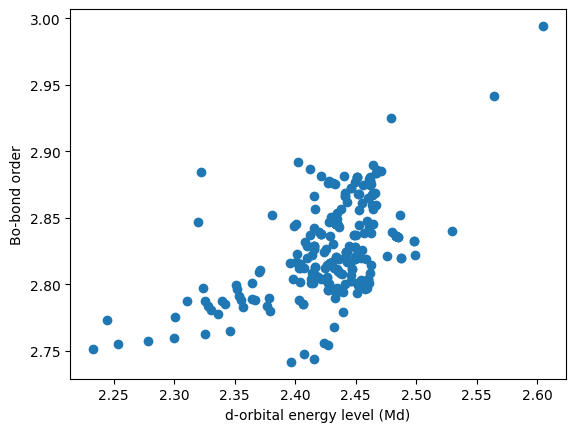

In [ ]:
plt.scatter(data['d-orbital energy level (Md)'], data['Bo-bond order'])
plt.xlabel('d-orbital energy level (Md)')
plt.ylabel('Bo-bond order')
plt.show()

In [ ]:
# Data points, Reference for data: Sidhu, Sarabjeet Singh, Harpreet Singh, and Mohamed Abdel-Hady Gepreel.
#"A review on alloy design, biological response, and strengthening of β-titanium alloys as biomaterials." Materials Science and Engineering: C 121 (2021): 111661.
# get data points using a tool: https://apps.automeris.io/wpd/
Ms_data = np.array([(2.362, 2.797),(2.365, 2.797),(2.369, 2.797),(2.372, 2.797),(2.376, 2.798),(2.379, 2.798),(2.383, 2.798),(2.386, 2.799),(2.390, 2.799),(2.393, 2.799),(2.397, 2.800),(2.401, 2.801),(2.404, 2.802),(2.407, 2.805),(2.409, 2.807),(2.411, 2.810),(2.412, 2.813),(2.413, 2.815),(2.414, 2.818),(2.415, 2.820),(2.417, 2.823),(2.419, 2.825),(2.420, 2.828),(2.422, 2.830),(2.424, 2.833),(2.426, 2.835),(2.428, 2.838),(2.429, 2.840),(2.431, 2.843),(2.431, 2.846),(2.432, 2.848),(2.433, 2.851),(2.434, 2.853),(2.436, 2.856),(2.437, 2.858),(2.439, 2.861),(2.441, 2.864),(2.443, 2.866),(2.444, 2.869),(2.446, 2.871),(2.448, 2.874),(2.449, 2.876),(2.451, 2.879),(2.452, 2.881),(2.453, 2.884),(2.455, 2.887),(2.457, 2.889),(2.459, 2.891),(2.461, 2.893),(2.464, 2.895),(2.466, 2.896),(2.467, 2.897),(2.469, 2.898),(2.471, 2.899),(2.473, 2.900),(2.476, 2.902),(2.480, 2.903),(2.483, 2.905),(2.487, 2.906),(2.490, 2.907),(2.494, 2.908),(2.498, 2.909),(2.501, 2.910),(2.504, 2.911),(2.510, 2.913),(2.512, 2.914),(2.518, 2.916),(2.521, 2.916),(2.527, 2.918),(2.529, 2.919)])
Mf1_data = np.array([(2.363, 2.772),(2.366, 2.774),(2.369, 2.775),(2.372, 2.776),(2.375, 2.777),(2.378, 2.778),(2.381, 2.780),(2.383, 2.781),(2.386, 2.783),(2.387, 2.784),(2.387, 2.785),(2.386, 2.787),(2.384, 2.788),(2.382, 2.789),(2.380, 2.790),(2.378, 2.791),(2.376, 2.791),(2.372, 2.792),(2.370, 2.792),(2.367, 2.793),(2.369, 2.793),(2.371, 2.793),(2.373, 2.793),(2.376, 2.793),(2.380, 2.794),(2.383, 2.794),(2.387, 2.794),(2.391, 2.795),(2.394, 2.795),(2.398, 2.796),(2.401, 2.796),(2.404, 2.797),(2.408, 2.797),(2.412, 2.798),(2.415, 2.798),(2.419, 2.799),(2.421, 2.800),(2.424, 2.801),(2.426, 2.802),(2.429, 2.804),(2.431, 2.805),(2.433, 2.807),(2.434, 2.809),(2.436, 2.812),(2.436, 2.815),(2.436, 2.818),(2.437, 2.821),(2.437, 2.824),(2.437, 2.826),(2.437, 2.829),(2.438, 2.832),(2.439, 2.834),(2.439, 2.836),(2.440, 2.838),(2.442, 2.840),(2.443, 2.842),(2.445, 2.844),(2.446, 2.846),(2.448, 2.848),(2.450, 2.851),(2.451, 2.852),(2.453, 2.855),(2.454, 2.857),(2.456, 2.859),(2.458, 2.861),(2.460, 2.863),(2.461, 2.865),(2.463, 2.867),(2.465, 2.870),(2.466, 2.871)])
Mf2_data = np.array([(2.360, 2.770),(2.362, 2.771),(2.365, 2.772),(2.368, 2.773),(2.371, 2.774),(2.373, 2.774),(2.376, 2.775),(2.378, 2.776),(2.381, 2.777),(2.384, 2.778),(2.387, 2.778),(2.391, 2.780),(2.394, 2.781),(2.397, 2.782),(2.399, 2.782),(2.402, 2.784),(2.406, 2.785),(2.409, 2.785),(2.412, 2.786),(2.415, 2.787),(2.418, 2.788),(2.421, 2.789),(2.424, 2.789),(2.427, 2.790),(2.430, 2.791),(2.433, 2.792),(2.436, 2.793),(2.439, 2.794),(2.442, 2.795),(2.445, 2.796),(2.448, 2.797),(2.450, 2.798),(2.453, 2.800),(2.455, 2.801),(2.457, 2.803),(2.459, 2.805),(2.461, 2.807),(2.462, 2.809),(2.463, 2.811),(2.464, 2.814),(2.465, 2.817),(2.466, 2.820),(2.467, 2.823),(2.469, 2.826),(2.471, 2.829),(2.472, 2.832),(2.474, 2.836),(2.475, 2.839),(2.476, 2.842),(2.477, 2.845),(2.479, 2.848),(2.480, 2.850)])
Alfa_data = np.array([(2.421, 2.760),(2.422, 2.762),(2.424, 2.764),(2.426, 2.766),(2.428, 2.768),(2.429, 2.769),(2.431, 2.771),(2.433, 2.773),(2.434, 2.775),(2.436, 2.776),(2.437, 2.778),(2.439, 2.780),(2.442, 2.783),(2.444, 2.786),(2.445, 2.788)])


<ipython-input-7-8599850dd0fa>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['d-orbital energy level (Md)'], data['Bo-bond order'], cmap='viridis')


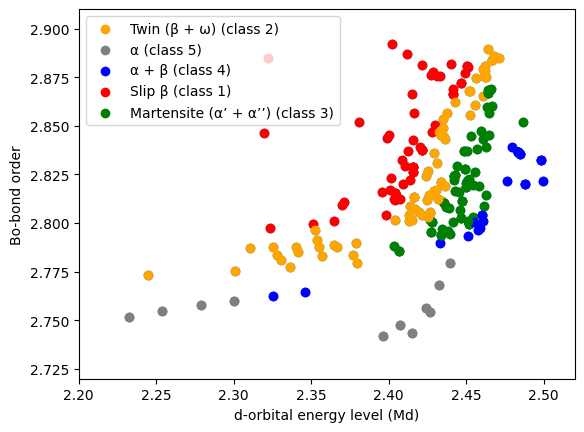

In [ ]:
# Scatter data points
plt.scatter(data['d-orbital energy level (Md)'], data['Bo-bond order'], cmap='viridis')

# Add color for each point based on their position relative to the Ms curve
for i, point in enumerate(data[['d-orbital energy level (Md)', 'Bo-bond order']].values):
    if point[1] >= np.interp(point[0], Ms_data[:, 0], Ms_data[:, 1]):
        plt.scatter(point[0], point[1], c='red', marker='o', label='Slip β (class 1)')
    elif point[1] >= np.interp(point[0], Mf1_data[:, 0], Mf1_data[:, 1]):
        plt.scatter(point[0], point[1], c='orange', marker='o', label='Twin (β + ω) (class 2)')
    elif point[1] >= np.interp(point[0], Mf2_data[:, 0], Mf2_data[:, 1]):
        plt.scatter(point[0], point[1], c='green', marker='o', label='Martensite (α’ + α’’) (class 3)')
    elif point[1] >= np.interp(point[0], Alfa_data[:, 0], Alfa_data[:, 1]):
        plt.scatter(point[0], point[1], c='blue', marker='o', label='α + β (class 4)')
    else:
        plt.scatter(point[0], point[1], c='gray', marker='o', label='α (class 5)')

# Customize the plot
# Note: I added the "handles, labels = ax.get_legend_handles_labels()" line to remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("d-orbital energy level (Md)")
plt.ylabel("Bo-bond order")
plt.xlim(2.2, 2.52)
plt.ylim(2.72, 2.91)

# Save the plot as SVG before showing it
plt.savefig("Bo_Md.svg", format='svg')

# Render the plot
plt.show()


In [ ]:

def assign_group(row):
    x, y = row['d-orbital energy level (Md)'], row['Bo-bond order']
    if y >= np.interp(x, Ms_data[:, 0], Ms_data[:, 1]):
        return 1 #red, Slip Beta
    elif y >= np.interp(x, Mf1_data[:, 0], Mf1_data[:, 1]):
        return 2 #orange, Tween Beta + Omega
    elif y >= np.interp(x, Mf2_data[:, 0], Mf2_data[:, 1]):
        return 3 #green, Martensite Alfa' + Alfa''
    elif y >= np.interp(x, Alfa_data[:, 0], Alfa_data[:, 1]):
        return 4 #blue, Alfa + Beta
    else:
        return 5 #gray, Alfa

data['group'] = data.apply(assign_group, axis=1)
data['group']

0      2
1      2
2      2
3      2
4      2
      ..
238    4
239    4
240    3
241    5
242    4
Name: group, Length: 243, dtype: int64

### 'e/a ratio' vs. Delta r

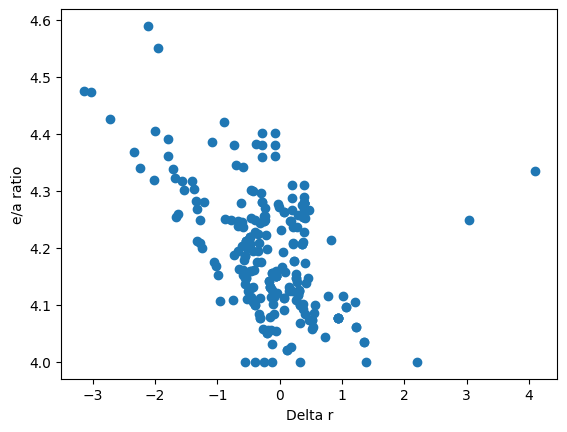

In [ ]:
plt.scatter(data['Delta r'], data['e/a ratio'])
plt.xlabel('Delta r')
plt.ylabel('e/a ratio')
plt.show()

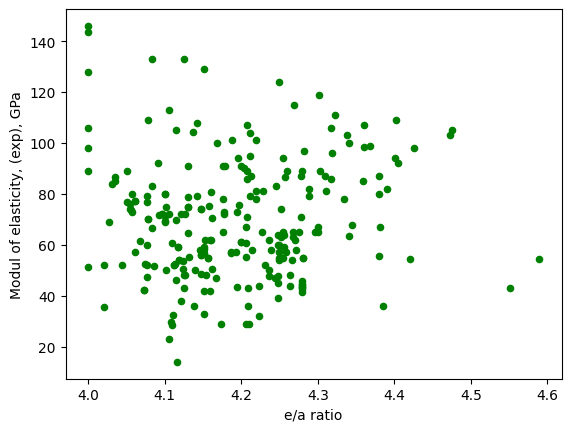

In [ ]:
plt.scatter(data['e/a ratio'], data['Modul elast, exp, GPa'], c='g', s=20)  # c='g' for green color, s=50 for size
plt.xlabel('e/a ratio')
plt.ylabel('Modul of elasticity, (exp), GPa')
plt.show()


In [ ]:
#Figure 2 from: https://pubs.acs.org/doi/full/10.1021/acsomega.1c05474
e_a_arr1 = np.array([(-2.6422, 4.0029), (-2.6239, 4.0107), (-2.6055, 4.0193),
                (-2.5780, 4.0271), (-2.5596, 4.0364), (-2.5321, 4.0442),
                (-2.5138, 4.0528), (-2.4862, 4.0606), (-2.4587, 4.0706),
                (-2.4220, 4.0791), (-2.4037, 4.0863), (-2.3578, 4.0955),
                (-2.3303, 4.1048), (-2.2844, 4.1155), (-2.2385, 4.1255),
                (-2.1743, 4.1355), (-2.1284, 4.1462), (-2.0550, 4.1540),
                (-1.9633, 4.1619), (-1.8624, 4.1697), (-1.7706, 4.1747),
                (-1.6514, 4.1797), (-1.5229, 4.1840), (-1.3578, 4.1861),
                (-1.1560, 4.1889), (-0.9541, 4.1918), (-0.7248, 4.1939),
                (-0.4771, 4.1961), (-0.3028, 4.1954), (-0.1376, 4.1968),
                (-0.0550, 4.2025), (-0.0092, 4.2089), (0.0275, 4.2168),
                (0.0550, 4.2246), (0.0826, 4.2396), (0.0826, 4.2553),
                (0.0826, 4.2902), (0.0826, 4.3109), (0.0734, 4.3380),
                (0.0550, 4.3979), (0.1193, 4.3829), (0.1468, 4.3715),
                (0.1743, 4.3622), (0.2202, 4.3529), (0.2844, 4.3365),
                (0.3211, 4.3230), (0.4037, 4.3045), (0.3761, 4.3123),
                (0.0826, 4.3223), (0.0826, 4.2752), (0.4404, 4.2945),
                (0.5046, 4.2838), (0.5688, 4.2695), (0.6422, 4.2567),
                (0.7431, 4.2446), (0.8532, 4.2339), (0.9908, 4.2246),
                (1.1376, 4.2160), (1.2477, 4.2082), (1.4128, 4.1996),
                (1.6055, 4.1904), (1.7431, 4.1840), (1.9083, 4.1761),
                (2.0642, 4.1683), (2.3028, 4.1569), (2.5229, 4.1455),
                (2.7339, 4.1348), (2.9725, 4.1248), (3.2018, 4.1155),
                (3.4128, 4.1084), (3.6055, 4.1020), (3.8165, 4.0955)])

#Figure 3 from: https://pubs.acs.org/doi/full/10.1021/acsomega.1c05474

e_a_arr2 = np.array([(-1.039, 3.800),(-0.948, 3.822),(-0.809, 3.853),(-0.662, 3.885),(-0.523, 3.914),(-0.380, 3.945),(-0.246, 3.974),(-0.147, 4.008),(-0.201, 4.046),(-0.335, 4.077),(-0.559, 4.108),(-0.845, 4.110),(-1.131, 4.101),(-1.417, 4.099),(-1.705, 4.102),(-1.989, 4.117),(-2.276, 4.141),(-2.508, 4.168),(-2.624, 4.207),(-2.597, 4.260),(-2.562, 4.294),(-2.512, 4.323),(-2.401, 4.335),(-2.246, 4.332),(-2.195, 4.319),(-2.070, 4.287),(-1.929, 4.255),(-1.718, 4.221),(-1.453, 4.195),(-1.167, 4.177),(-0.875, 4.188),(-0.672, 4.218),(-0.594, 4.246),(-0.559, 4.282),(-0.523, 4.312),(-0.362, 4.353),(-0.196, 4.351),(-0.076, 4.344),(0.184, 4.314),(0.425, 4.281),(0.658, 4.251),(0.863, 4.219),(1.105, 4.191),(1.391, 4.167),(1.677, 4.155),(1.963, 4.167),(2.249, 4.191),(2.535, 4.215),(2.822, 4.231),(3.108, 4.235),(3.394, 4.234),(3.680, 4.230),(3.904, 4.223), (5.0,4.0)])

In [ ]:
import matplotlib.path as mpltPath
import numpy as np

# Let's assume you have sorted the points in your array
# e_a_arr2 = np.array([...])

# Create a path object from the points
path = mpltPath.Path(e_a_arr2)

# Create points from your dataframe columns
points = data[['Delta r', 'e/a ratio']].values

# Check if each point is inside the path
inside = path.contains_points(points)

# Create a new column 'slip_tw_group' in the dataframe
# Points inside the path get value 1, outside get value 2
data['slip_tw_group'] = np.where(inside, 1, 2)


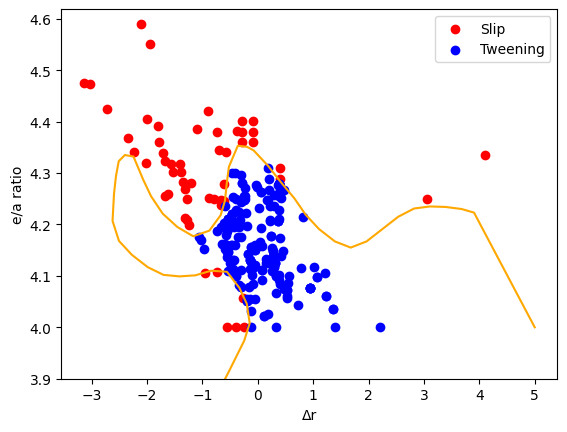

In [ ]:
# Scatter data points
plt.scatter(data.loc[data['slip_tw_group'] == 2, 'Delta r'],
            data.loc[data['slip_tw_group'] == 2, 'e/a ratio'],
            c='red',
            marker='o',
            label='Slip')  # Slip

plt.scatter(data.loc[data['slip_tw_group'] == 1, 'Delta r'],
            data.loc[data['slip_tw_group'] == 1, 'e/a ratio'],
            c='blue',
            marker='o',
            label='Tweening')  # Tweening

# Customize the plot
plt.xlabel('Δr')
plt.ylabel('e/a ratio')
plt.ylim(3.9, plt.ylim()[1])  # Set lower limit to 4.0 and upper limit to current upper limit

# Plot the path
plt.plot(*e_a_arr2.T, color='#FFA800')

# Add a legend
plt.legend()

# Save the plot as SVG before showing it
plt.savefig("e_a_delta_r.svg", format='svg')

# Render the plot
plt.show()


In [ ]:
data['slip_tw_group']

0      2
1      2
2      2
3      2
4      2
      ..
238    1
239    1
240    1
241    1
242    1
Name: slip_tw_group, Length: 243, dtype: int64

# Explanatory data analysis

##Cleaning the data, Data preprocessing:

Outlier detection

Identifying any unusual or extreme values in the data.

Handle missing values appropriately by either imputing them or dropping rows/columns with missing values.

Scale or normalize your features to ensure that they are on the same scale.

####Delete unnecessary columns

In [ ]:
cols_to_remove = ['_Sort',
                  #'Ru,wt.%', 'Ru,at.%', 'Al,wt.%', 'Al,at.%', 'Ni,wt.%', 'Ni,at.%', 'Hf,wt.%','Hf,at.%', 'W,wt.%', 'W,at.%', 'Pt,wt.%', 'Pt,at.%', 'Co,wt.%', 'Co,at.%',
                  #'±d(GPa)',
                  'Elongation, %', 'max Tensile strength (MPa)', 'Yield strength (MPa)',
                  'Hardness (HV)', 'Product', 'Mechanical treatment', 'Deformation, %',
                  'Heat treatment', 'HT1: T, C', 'HT1: t, min', 'HT2: T, C', 'HT2: t, min', 'Reference']
data = data.drop(cols_to_remove, axis=1)

In [ ]:
# Check for NaN values in the 'data' DataFrame
nan_values = data.isna().any()

# Print the columns with NaN values
print(nan_values)

Material                       False
Ti,wt.%                        False
Ti,at.%                        False
Nb,wt.%                        False
Nb,at.%                        False
Zr,wt.%                        False
Zr,at.%                        False
Ta,wt.%                        False
Ta,at.%                        False
Sn,wt.%                        False
Sn,at.%                        False
Fe,wt.%                        False
Fe,at.%                        False
Mn,wt.%                        False
Mn,at.%                        False
Si,wt.%                        False
Si,at.%                        False
Mo,wt.%                        False
Mo,at.%                        False
O,wt.%                         False
O,at.%                         False
N,wt.%                         False
N,at.%                         False
C,wt.%                         False
C,at.%                         False
Modul elast, exp, GPa          False
±d(GPa)                        False
W

###Outlier detection

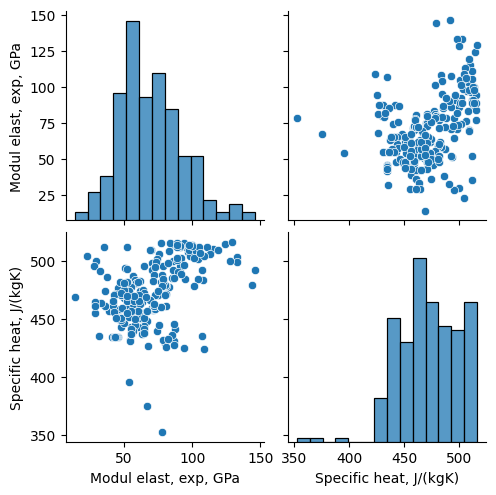

In [ ]:
sns.pairplot(data[['Modul elast, exp, GPa', 'Specific heat, J/(kgK)']], diag_kind='hist')

####Linear Regression

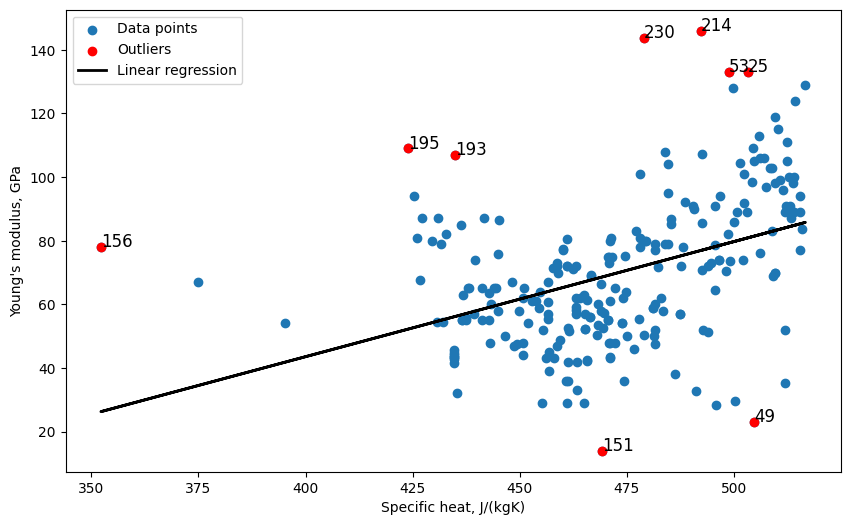

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the features and target
X = data[['Specific heat, J/(kgK)']]
y = data['Modul elast, exp, GPa']

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the data
lr_model.fit(X, y)

# Make predictions
y_pred = lr_model.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Define a threshold for significant deviation
threshold = 2.4 * np.std(residuals)

# Find the indices of data points with residuals greater than the threshold
outlier_indices = np.where(np.abs(residuals) > threshold)[0]

# Plot the data points and mark the outliers
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')
plt.scatter(X.iloc[outlier_indices], y.iloc[outlier_indices], c='red', label='Outliers')

# Add the indices as text labels
for i in outlier_indices:
    plt.text(X.iloc[i], y.iloc[i], f"{i}", fontsize=12)

# Plot the regression line
plt.plot(X, y_pred, color='black', linewidth=2, label='Linear regression')

plt.xlabel('Specific heat, J/(kgK)')
plt.ylabel("Young's modulus, GPa")
plt.legend()

# Save the plot as SVG
plt.savefig("LR_Spec_heat.svg", format="svg")

plt.show()


In [ ]:
# Convert the outlier indices from NumPy array to a Python list
outlier_indices_list = outlier_indices.tolist()

print("Outlier indices:", outlier_indices_list)

Outlier indices: [25, 49, 53, 151, 156, 193, 195, 214, 230]


In [ ]:
# Remove rows with outliers
data_lr = data.drop(outlier_indices_list)
data_lr.shape

(234, 46)

####Z-score method:
This method identifies outliers by calculating the number of standard deviations that a data point is away from the mean. Any data point that is more than 3 standard deviations away from the mean is considered an outlier.

In [ ]:
from scipy import stats

# Calculate the Z-scores for the 'Modul elast, exp, GPa' column
z_scores = np.abs(stats.zscore(data['Modul elast, exp, GPa']))

# Set the threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 2

# Find the indices of the outliers
outlier_indices = np.where(z_scores > threshold)

# Print the outlier indices
print("Outlier indices:", outlier_indices)

# Create a new DataFrame without the outliers
data_z_scores = data[(z_scores <= threshold)]

# Print the original and the new DataFrame shapes
print("Original data shape:", data.shape)
print("Data without outliers shape:", data_z_scores.shape)


Outlier indices: (array([  0,   4,  15,  25,  49,  53, 151, 213, 214, 230]),)
Original data shape: (243, 46)
Data without outliers shape: (233, 46)


In [ ]:
outlier_indices_array = np.array(outlier_indices[0])
print("Outlier indices as array:", outlier_indices_array)

Outlier indices as array: [  0   4  15  25  49  53 151 213 214 230]


####IQR method:
This method involves calculating the interquartile range (IQR) and identifying outliers as any data points that fall outside of the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR).

NaN values in the output from the IQR method for outlier detection means that there are no outliers detected by this method in those columns.

The value of X indicates the distance from the median in terms of the interquartile range.

In [ ]:
Q1 = z_scores.quantile(0.25)
Q3 = z_scores.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = z_scores[(z_scores < lower_bound) | (z_scores > upper_bound)]
print(outliers_iqr)

0      2.336601
15     2.551499
25     2.729863
53     2.725995
151    2.391135
213    2.508519
214    3.282149
230    3.186305
Name: Modul elast, exp, GPa, dtype: float64


####Local Outlier Factor (LOF) method:
This method calculates the density of data points in the neighborhood of each point and identifies outliers as points with a much lower density than their neighbors.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05) #contamination=0.05 'auto'
outlier_scores = lof.fit_predict(data.select_dtypes(include=np.number))
outliers_lof = np.where(outlier_scores == -1)[0]
print(outliers_lof)

[ 73  78  94  95 155 156 195 214 222 223 224 225 230]


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_scores = lof.fit_predict(data[['Modul elast, exp, GPa']])
outliers_lof = np.where(outlier_scores == -1)[0]
print(outliers_lof)

[  0  15  25  49  50  53 151 153 154 166 213 214 230]


In [ ]:
# Remove rows with outliers
data_lof = data.drop(outliers_lof)
data_lof.shape

(230, 46)

###Combined Outliers

In [ ]:
combined_outliers = np.unique(np.concatenate((outlier_indices_array, outliers_lof)))
print("Combined outlier indices:", combined_outliers)

Combined outlier indices: [  0   4  15  25  49  50  53 151 153 154 166 213 214 230]


In [ ]:
data_out = data_lof = data.drop(combined_outliers)
data_out.shape

(229, 46)

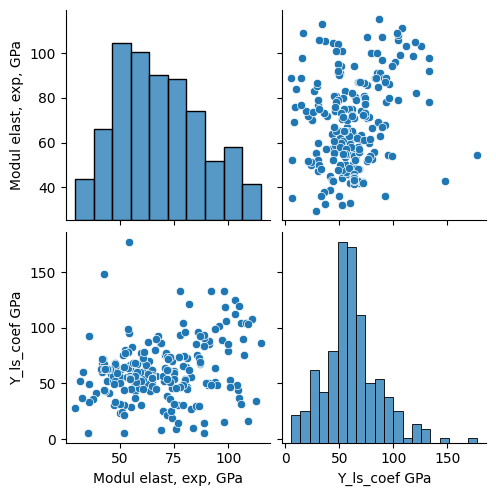

In [ ]:
sns.pairplot(data_out[['Modul elast, exp, GPa', 'Y_ls_coef GPa']], diag_kind='hist')

###CorrMatrix

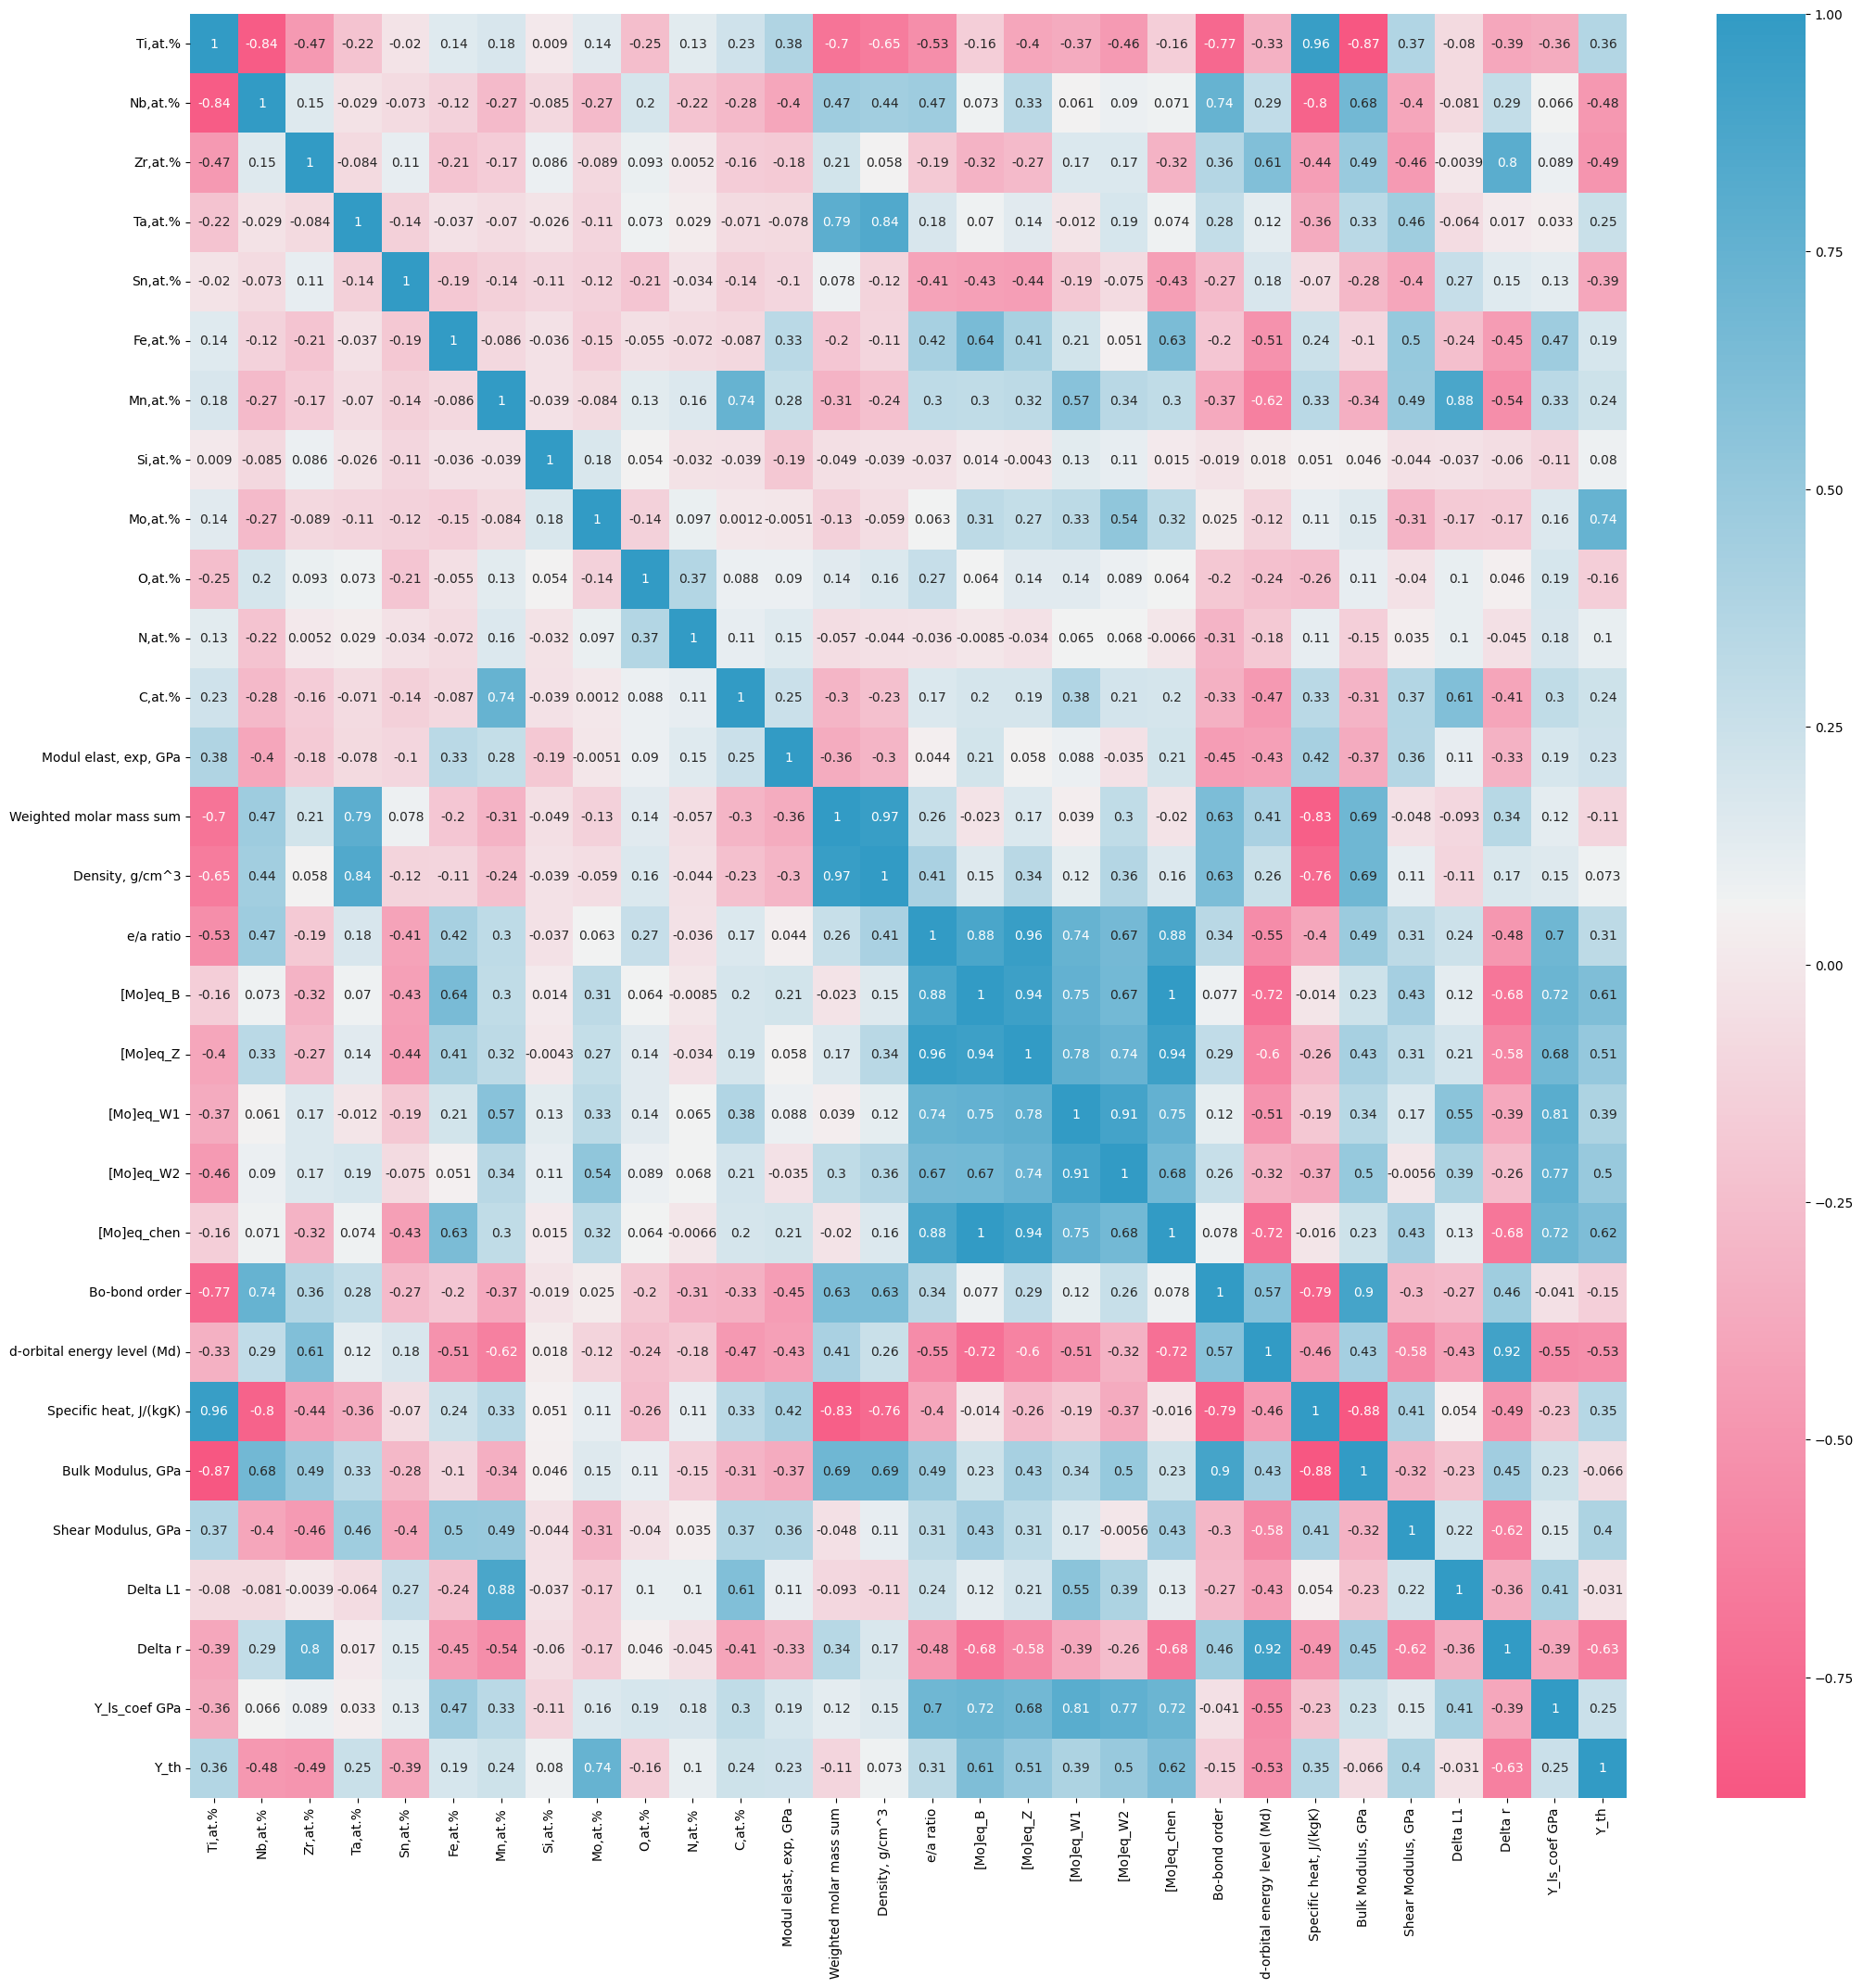

In [ ]:
cols_to_include = ['Ti,at.%', 'Nb,at.%',
       'Zr,at.%', 'Ta,at.%', 'Sn,at.%',
       'Fe,at.%', 'Mn,at.%', 'Si,at.%',
       #'V,at.%',  'Cu,at.%', 'Cr,at.%',
       'Mo,at.%', 'O,at.%', 'N,at.%',
       'C,at.%', 'Modul elast, exp, GPa', 'Weighted molar mass sum',
       'Density, g/cm^3', 'e/a ratio', '[Mo]eq_B', '[Mo]eq_Z', '[Mo]eq_W1',
       '[Mo]eq_W2', '[Mo]eq_chen', 'Bo-bond order',
       'd-orbital energy level (Md)', 'Specific heat, J/(kgK)',
       'Bulk Modulus, GPa', 'Shear Modulus, GPa', 'Delta L1', 'Delta r',
       'Y_ls_coef GPa', 'Y_th']

corrMatrix = data.loc[:, cols_to_include].corr()
fig, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap=cmap)
plt.show()

#Feature selection

####Restart

In [ ]:
#dataf = data #restart
#dataf = data_lof
#dataf = data_z_scores
#dataf = data_out
dataf = data_lr

####Features and Target

Feature engineering:

Create new features that may have a stronger relationship with the target variable.

Perform transformations on existing features (e.g., log, square root, etc.) to improve their relationship with the target variable.

Remove irrelevant or highly correlated features to reduce noise in the model.

Feature selection:

Use methods like Recursive Feature Elimination (RFE), LASSO, or other regularization techniques to select the most important features for your model.

Use techniques like mutual information or correlation analysis to identify relevant features.

In [ ]:
features = [#'Material',
            'Ti,wt.%',
            #'Ti,at.%',
            'Nb,wt.%',
            #'Nb,at.%',
            'Zr,wt.%',
            #'Zr,at.%',
            'Ta,wt.%',
            #'Ta,at.%',
            'Sn,wt.%',
            #'Sn,at.%',
            'Fe,wt.%',
            #'Fe,at.%',
            'Mn,wt.%',
            #'Mn,at.%',
            'Si,wt.%',
            #'Si,at.%',
            #'V,wt.%',
            #'V,at.%',
            'Mo,wt.%',
            #'Mo,at.%',
            #'Cu,wt.%',
            #'Cu,at.%',
            #'Cr,wt.%',
            #'Cr,at.%',
            'O,wt.%',
            #'O,at.%',
            #'N,wt.%',
            #'N,at.%',
            #'C,wt.%',
            #'C,at.%',
            #'Modul elast, exp, GPa',
            '±d(GPa)',
            #'Weighted molar mass sum',
            'Density, g/cm^3',
            'e/a ratio',
            '[Mo]eq_B',
            #'[Mo]eq_Z',
            '[Mo]eq_W1',
            #'[Mo]eq_W2',
            #'[Mo]eq_chen',
            'Bo-bond order',
            'd-orbital energy level (Md)',
            'Specific heat, J/(kgK)',
            #'Bulk Modulus, GPa',
            #'Shear Modulus, GPa',
            #'Delta L1',
            'Delta r',
            #'Y_ls_coef GPa',
            #'Y_th'
            'group',
            'slip_tw_group'
            ]

In [ ]:
target = ['Modul elast, exp, GPa']

In [ ]:
features

['Ti,wt.%',
 'Nb,wt.%',
 'Zr,wt.%',
 'Ta,wt.%',
 'Sn,wt.%',
 'Fe,wt.%',
 'Mn,wt.%',
 'Si,wt.%',
 'Mo,wt.%',
 'O,wt.%',
 '±d(GPa)',
 'Density, g/cm^3',
 'e/a ratio',
 '[Mo]eq_B',
 '[Mo]eq_W1',
 'Bo-bond order',
 'd-orbital energy level (Md)',
 'Specific heat, J/(kgK)',
 'Delta r',
 'group',
 'slip_tw_group']

#Data split and normalization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
# first divide set
X = dataf[features].values #returns a numpy array
y = dataf[target].values.reshape(-1) #returns a numpy array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# fit scaler on training data
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

# transform data
X_train = min_max_scaler.transform(X_train)

# transform testing data
X_test = min_max_scaler.transform(X_test)

In [ ]:
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(234, 21) (234,) (152, 21) (152,) (82, 21) (82,)


The random_state parameter is used to set a seed for the random number generator, which ensures that the results are reproducible.

When you set the random_state to an integer (in this case, 42), it will make sure that the same random numbers are generated each time the code is run, provided that the same input data and algorithm are used. This is helpful when you want to have consistent results across multiple runs of your code, especially during development, testing, and debugging.


#Prediction models

####What methods are best?

In [ ]:
! pip install lazypredict

In [ ]:
# Importing the libraries
from lazypredict.Supervised import LazyRegressor
#from sklearn import datasets
from sklearn.utils import shuffle

In [ ]:
# building the pipeline
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = reg.fit(X_train, X_test, y_train, y_test)

# Printing all model performances
models_train

100%|██████████| 42/42 [00:02<00:00, 15.07it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00, 10.15it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.99,0.99,2.37,0.01
ExtraTreeRegressor,0.99,0.99,2.37,0.01
ExtraTreesRegressor,0.99,0.99,2.37,0.13
GaussianProcessRegressor,0.99,0.99,2.37,0.04
XGBRegressor,0.99,0.99,2.37,0.15
GradientBoostingRegressor,0.94,0.95,5.05,0.13
RandomForestRegressor,0.92,0.93,5.67,0.21
BaggingRegressor,0.89,0.91,6.65,0.05
HistGradientBoostingRegressor,0.87,0.89,7.11,0.12


####Import tools

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error, mean_absolute_percentage_error
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

###ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for ExtraTreesRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the ExtraTreesRegressor model
etr = ExtraTreesRegressor(random_state=42)

# Set up the GridSearchCV
grid_search_etr = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search_etr.fit(X_train, y_train)

# Get the best parameters
best_params_etr = grid_search_etr.best_params_
print("Best parameters for ExtraTreesRegressor:", best_params_etr)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: ignored

In [ ]:
# Create and fit the model with the best parameters
best_etr = ExtraTreesRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
best_etr.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred_etr = best_etr.predict(X_train)
# Make predictions on the test set
y_pred_etr = best_etr.predict(X_test)

In [ ]:
print("TRAIN SET")
print("Extra Trees MAE ", mean_absolute_error(y_train, y_train_pred_etr), " r2 ", r2_score(y_train, y_train_pred_etr), " MSE ", mean_squared_error(y_train, y_train_pred_etr), " MAX ", max_error(y_train, y_train_pred_etr), " MAPE ", mean_absolute_percentage_error(y_train, y_train_pred_etr))

print("TEST SET")
print("Extra Trees MAE ", mean_absolute_error(y_test, y_pred_etr), " r2 ", r2_score(y_test, y_pred_etr), " MSE ", mean_squared_error(y_test, y_pred_etr), " MAX ", max_error(y_test, y_pred_etr), " MAPE ", mean_absolute_percentage_error(y_test, y_pred_etr))

TRAIN SET
Extra Trees MAE  0.6645007999214763  r2  0.9878820714795166  MSE  5.654715326230317  MAX  14.5  MAPE  0.011497178724511208
TEST SET
Extra Trees MAE  7.722283469010662  r2  0.6993685815473073  MSE  119.57521593486584  MAX  38.938860000000005  MAPE  0.11832593790768223


####Visualization

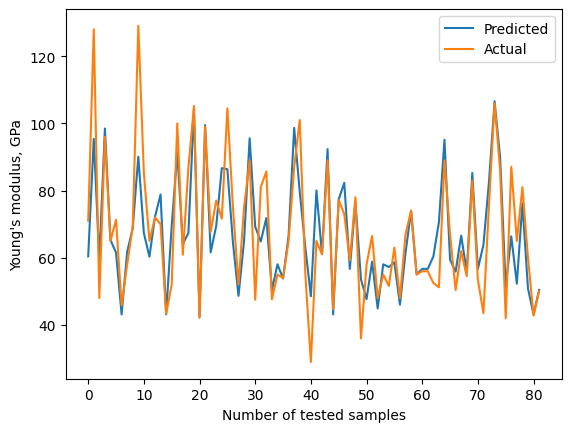

In [ ]:
plt.plot(y_pred_etr, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Number of tested samples')
plt.ylabel("Young's modulus, GPa")
plt.legend()

In [ ]:
y_test

array([ 71.  , 128.  ,  48.  ,  96.  ,  65.  ,  71.3 ,  45.8 ,  58.  ,
        69.3 , 129.  ,  85.2 ,  65.  ,  72.  ,  70.  ,  43.3 ,  52.  ,
       100.  ,  60.9 ,  86.8 , 105.17,  42.1 ,  99.  ,  67.7 ,  77.  ,
        71.62, 104.47,  75.  ,  52.  ,  75.  ,  89.  ,  47.5 ,  81.  ,
        85.7 ,  47.63,  55.  ,  54.  ,  65.  ,  87.  , 101.  ,  55.3 ,
        29.  ,  65.  ,  61.  ,  89.  ,  44.7 ,  77.2 ,  73.  ,  59.2 ,
        78.  ,  36.  ,  58.  ,  66.5 ,  48.  ,  55.  ,  51.6 ,  63.  ,
        48.  ,  67.  ,  74.  ,  55.  ,  56.  ,  56.  ,  52.5 ,  51.21,
        89.  ,  67.  ,  50.4 ,  62.  ,  54.5 ,  82.98,  53.5 ,  43.5 ,
        76.  , 106.  ,  86.  ,  42.  ,  87.09,  65.  ,  81.  ,  60.  ,
        42.8 ,  50.  ])

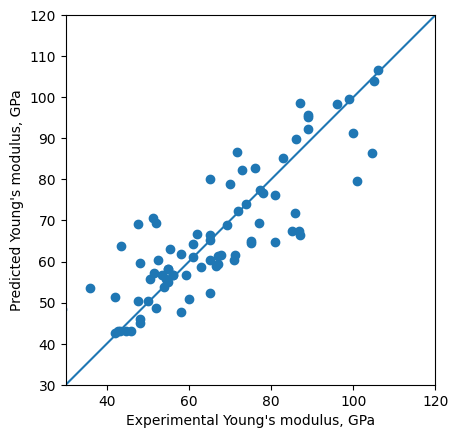

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_etr)
plt.xlabel("Experimental Young's modulus, GPa")
plt.ylabel("Predicted Young's modulus, GPa")
lims = [30, 120]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
#plt.savefig('true_vs_pred.eps')

1. feature Specific heat, J/(kgK) (0.137839)
2. feature Ti,wt.% (0.129020)
3. feature Si,wt.% (0.100707)
4. feature d-orbital energy level (Md) (0.094269)
5. feature Bo-bond order (0.072545)
6. feature Nb,wt.% (0.050189)
7. feature [Mo]eq_B (0.045555)
8. feature Zr,wt.% (0.043689)
9. feature Delta r (0.043578)
10. feature Fe,wt.% (0.038854)
11. feature ±d(GPa) (0.034911)
12. feature slip_tw_group (0.032574)
13. feature Density, g/cm^3 (0.029519)
14. feature e/a ratio (0.027929)
15. feature [Mo]eq_W1 (0.025359)
16. feature Mo,wt.% (0.021659)
17. feature Sn,wt.% (0.020806)
18. feature group (0.020246)
19. feature Ta,wt.% (0.017378)
20. feature O,wt.% (0.012235)
21. feature Mn,wt.% (0.001138)


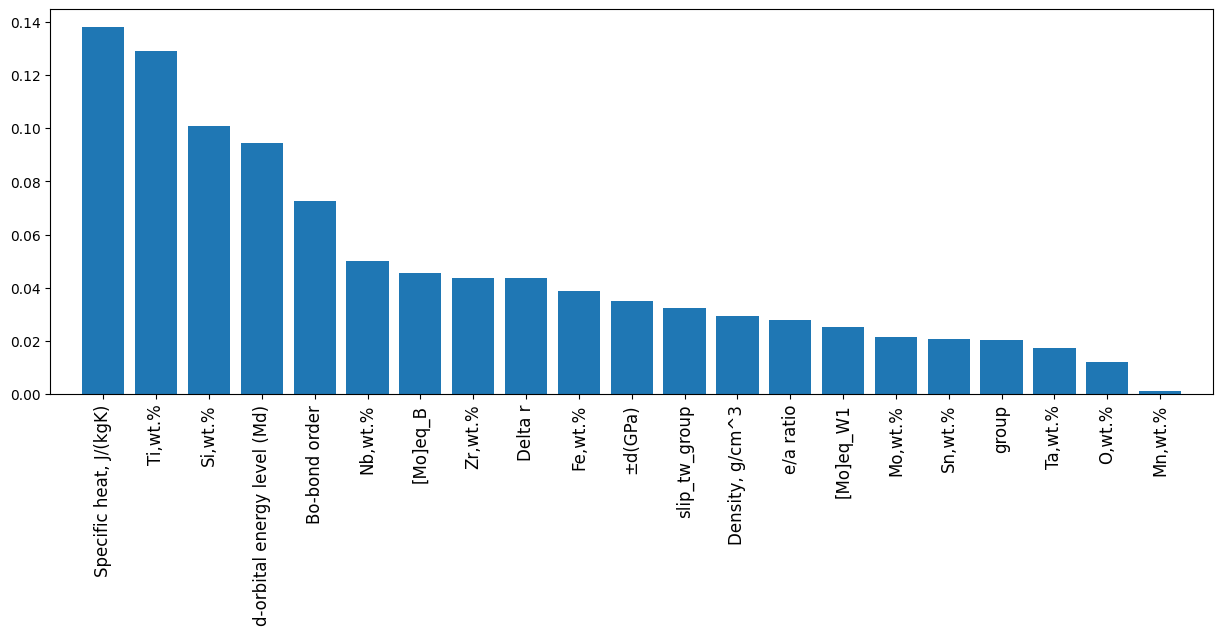

In [ ]:
# Get the feature importances
importances = best_etr.feature_importances_
indices = np.argsort(importances)[::-1]

# Assuming you have a list of feature names
feature_names = features

# Print the feature importances
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances with a larger figure size
plt.figure(figsize=(15, 5))
#plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90, fontsize=12)
plt.xlim([-1, X_train.shape[1]])

# Save the plot as SVG
plt.savefig("feature_importances.svg", format="svg")

plt.show()


In [ ]:
# Generate a grid of points for predictions
x1 = np.linspace(X_train[:, features.index('Ti,wt.%')].min(), X_train[:, features.index('Ti,wt.%')].max(), 55)
x2 = np.linspace(X_train[:, features.index('Nb,wt.%')].min(), X_train[:, features.index('Nb,wt.%')].max(), 55)
X1, X2 = np.meshgrid(x1, x2)


# Initialize a new array to store the prediction results
y_pred = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        # Create a sample dataset based on the original dataset
        X_sample = X_train.copy()

        # Modify the values of the required columns
        X_sample[:, features.index('Ti,wt.%')] = X1[i, j]
        X_sample[:, features.index('Nb,wt.%')] = X2[i, j]

        # Predict the target value and store it in the y_pred array
        y_pred[i, j] = best_etr.predict(X_sample).mean()

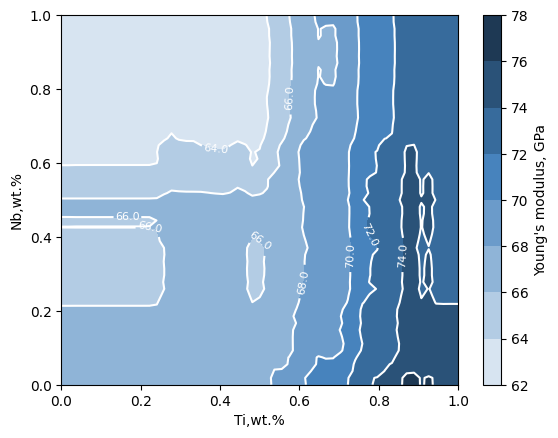

In [ ]:
# Create the contour plot
c = ('#d7e4f1', '#b3cce4', '#8fb4d7', '#6b9bca', '#4783bd', '#376b9c', '#2a5278', '#1e3954', '#112030')
contour_filled = plt.contourf(X1, X2, y_pred, colors=c)
contour = plt.contour(X1, X2, y_pred, colors='white')

plt.clabel(contour, colors='white', fmt='%2.1f', fontsize=8)
plt.xlabel('Ti,wt.%')
plt.ylabel('Nb,wt.%')
plt.colorbar(contour_filled, label="Young's modulus, GPa")
plt.show()

# Experimental design methods

###Installations

In [ ]:
!pip install pyDOE2

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=01e96617e15074cb9bfe73d4cd7d2ff3ffce273dd4a2683320af1c1e32670b97
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built pyDOE2


In [ ]:
!pip install python-ternary

In [ ]:
import ternary

###dictionary

In [ ]:
#molar_mass dictionary
molar_mass = {
    'Ti': 47.867,
    'Nb': 92.90637,
    'Zr': 91.224,
    'Ta': 180.94788,
    'Sn': 118.710,
    'Fe': 55.845,
    'Mn': 54.938045,
    'Si': 28.085,
    'Mo': 95.96,
    'O': 15.999
}

#element_densities dictionary
element_densities = {
    'Ti': 4.506,
    'Nb': 8.570,
    'Zr': 6.506,
    'Ta': 16.654,
    'Sn': 7.287,
    'Fe': 7.874,
    'Mn': 7.21,
    'Si': 2.329,
    'Mo': 10.22,
    'O': 1.429
}

#element_valence_electrons dictionary
element_valence_electrons = {
    'Ti': 4,
    'Nb': 5,
    'Zr': 4,
    'Ta': 5,
    'Sn': 4,
    'Fe': 8,
    'Mn': 7,
    'Si': 4,
    'Mo': 6,
    'O': 6
}

element_bond_orders = {
    'Ti': 2.79,
    'Nb': 3.099,
    'Zr': 3.086,
    'Ta': 3.144,
    'Sn': 2.283,
    'Fe': 2.651,
    'Mn': 2.723,
    'Si': 2.561,
    'Mo': 3.063,
    'O': 0
}

d_orbital_energy = {
    'Ti': 2.447,
    'Nb': 2.424,
    'Zr': 2.934,
    'Ta': 2.531,
    'Sn': 2.100,
    'Fe': 0.969,
    'Mn': 1.194,
    'Si': 2.200,
    'Mo': 1.961,
    'O': 0
}

specific_heat = {
    'Ti': 520,
    'Nb': 265,
    'Zr': 278,
    'Ta': 140,
    'Sn': 217,
    'Fe': 449,
    'Mn': 479,
    'Si': 710,
    'Mo': 251,
    'O': 0
}

bulk_modulus = {
    'Ti': 110,
    'Nb': 170,
    'Zr': 200,
    'Ta': 200,
    'Sn': 58,
    'Fe': 170,
    'Mn': 120,
    'Si': 100,
    'Mo': 230,
    'O': 0
}

shear_modulus = {
    'Ti': 44,
    'Nb': 38,
    'Zr': 33,
    'Ta': 67,
    'Sn': 18,
    'Fe': 82,
    'Mn': 76.5,
    'Si': 60,
    'Mo': 20,
    'O': 0
}

delta_L1 = {
    'Ti': 0,
    'Nb': 11.84763454,
    'Zr': 9.529619086,
    'Ta': 11.87813474,
    'Sn': 97.63453979,
    'Fe': -2.856852379,
    'Mn': 202.0367358,
    'Si': 84.04839366,
    'Mo': 6.649044327,
    'O': 0
}

delta_r = {
    'Ti': 0,
    'Nb': -1,
    'Zr': 13,
    'Ta': -1,
    'Sn': -6,
    'Fe': -21,
    'Mn': -20,
    'Si': -36,
    'Mo': -8,
    'O': 0
}

element_young_modulus = {
    'Ti': 116,
    'Nb': 105,
    'Zr': 67,
    'Ta': 186,
    'Sn': 50,
    'Fe': 211,
    'Mn': 198,
    'Si': 47,
    'Mo': 329,
    'O': 0
}

##Design matrix

In [ ]:
from itertools import combinations

elements = ['Nb,wt.%', 'Zr,wt.%', 'Ta,wt.%', 'Sn,wt.%', 'Fe,wt.%', 'Mn,wt.%', 'Si,wt.%', 'Mo,wt.%', 'O,wt.%']
main_component = 'Ti,wt.%'

combinations_with_ti = list(combinations(elements[:-1], 3))  # Exclude 'O,wt.%'
step = 4
min_value = 0
max_value = 40

compositions = []

for combination in combinations_with_ti:
    for i in range(min_value, max_value + 1, step):
        for j in range(min_value, max_value + 1 - i, step):
            for k in range(min_value, max_value + 1 - i - j, step):
                ti_percentage = 100 - i - j - k
                composition_dict = {
                    main_component: ti_percentage,
                    'O,wt.%': 0
                }
                # Set other elements to 0 or their values
                for elem in elements:
                    if elem in combination:
                        if elem == combination[0]:
                            composition_dict[elem] = i
                        elif elem == combination[1]:
                            composition_dict[elem] = j
                        elif elem == combination[2]:
                            composition_dict[elem] = k
                    else:
                        composition_dict[elem] = 0

                compositions.append(composition_dict)

In [ ]:
print(len(compositions))

16016


In [ ]:
compositions

[{'Ti,wt.%': 100,
  'O,wt.%': 0,
  'Nb,wt.%': 0,
  'Zr,wt.%': 0,
  'Ta,wt.%': 0,
  'Sn,wt.%': 0,
  'Fe,wt.%': 0,
  'Mn,wt.%': 0,
  'Si,wt.%': 0,
  'Mo,wt.%': 0},
 {'Ti,wt.%': 96,
  'O,wt.%': 0,
  'Nb,wt.%': 0,
  'Zr,wt.%': 0,
  'Ta,wt.%': 4,
  'Sn,wt.%': 0,
  'Fe,wt.%': 0,
  'Mn,wt.%': 0,
  'Si,wt.%': 0,
  'Mo,wt.%': 0},
 {'Ti,wt.%': 92,
  'O,wt.%': 0,
  'Nb,wt.%': 0,
  'Zr,wt.%': 0,
  'Ta,wt.%': 8,
  'Sn,wt.%': 0,
  'Fe,wt.%': 0,
  'Mn,wt.%': 0,
  'Si,wt.%': 0,
  'Mo,wt.%': 0},
 {'Ti,wt.%': 88,
  'O,wt.%': 0,
  'Nb,wt.%': 0,
  'Zr,wt.%': 0,
  'Ta,wt.%': 12,
  'Sn,wt.%': 0,
  'Fe,wt.%': 0,
  'Mn,wt.%': 0,
  'Si,wt.%': 0,
  'Mo,wt.%': 0},
 {'Ti,wt.%': 84,
  'O,wt.%': 0,
  'Nb,wt.%': 0,
  'Zr,wt.%': 0,
  'Ta,wt.%': 16,
  'Sn,wt.%': 0,
  'Fe,wt.%': 0,
  'Mn,wt.%': 0,
  'Si,wt.%': 0,
  'Mo,wt.%': 0},
 {'Ti,wt.%': 80,
  'O,wt.%': 0,
  'Nb,wt.%': 0,
  'Zr,wt.%': 0,
  'Ta,wt.%': 20,
  'Sn,wt.%': 0,
  'Fe,wt.%': 0,
  'Mn,wt.%': 0,
  'Si,wt.%': 0,
  'Mo,wt.%': 0},
 {'Ti,wt.%': 76,
  'O,wt.%': 0

In [ ]:
# Step 1: Create a new DataFrame with the desired alloy compositions (in wt.%).

design = pd.DataFrame(compositions)

# Step 2: Calculate the required columns based on the alloy compositions.
# Use the previously defined functions and calculations here to create the additional columns

# Step 2: Calculate the required columns based on the alloy compositions.

# First, we need to compute the atomic percentages for each element in the alloy
weight_percent_columns = [col for col in design.columns if "wt.%" in col]
at_percent_columns = [col.replace("wt.%", "at.%") for col in weight_percent_columns]

# Compute atomic percentages
for weight_col, at_col in zip(weight_percent_columns, at_percent_columns):
    element = weight_col.split(",")[0]
    design[at_col] = (design[weight_col] / molar_mass[element]) / (design[weight_percent_columns].div(list(molar_mass.values())).sum(axis=1))

# Calculate 'Density, g/cm^3'
design['Density, g/cm^3'] = (design[weight_percent_columns].mul(list(element_densities.values())).sum(axis=1) / 100).values

# Calculate 'e/a ratio'
design['e/a ratio'] = (design[at_percent_columns].mul(list(element_valence_electrons.values())).sum(axis=1) / 100).values

# Calculate '[Mo]eq_B'
design['[Mo]eq_B'] = (
    design['Mo,wt.%']
    + 0.28 * design['Nb,wt.%']
    + 0.22 * design['Ta,wt.%']
    + 2.90 * design['Fe,wt.%']
    + 1.54 * design['Mn,wt.%']
)

# Calculate '[Mo]eq_W1'
design['[Mo]eq_W1'] = (
    design['Mo,wt.%']
    + 0.28 * design['Nb,wt.%']
    + 0.22 * design['Ta,wt.%']
    + 1.93 * design['Fe,wt.%']
    + 2.26 * design['Mn,wt.%']
    + 0.30 * design['Sn,wt.%']
    + 0.47 * design['Zr,wt.%']
    + 3.01 * design['Si,wt.%']
)


# Calculate 'Bo-bond order'
design['Bo-bond order'] = (design[at_percent_columns].mul(list(element_bond_orders.values())).sum(axis=1) / 100).values

# Calculate 'd-orbital energy level (Md)'
design['d-orbital energy level (Md)'] = (design[at_percent_columns].mul(list(d_orbital_energy.values())).sum(axis=1) / 100).values

# Calculate 'Specific heat, J/(kgK)'
design['Specific heat, J/(kgK)'] = (design[at_percent_columns].mul(list(specific_heat.values())).sum(axis=1) / 100).values

# Calculate 'Delta r'
design['Delta r'] = (design[at_percent_columns].mul(list(delta_r.values())).sum(axis=1) / 100).values

#Assign Group
design['group'] = design.apply(assign_group, axis=1)

# Add 'slip_tw_group' column to DataFrame
design['slip_tw_group'] = 2

# Update 'slip_tw_group' based on the position relative to the line
for i, point in enumerate(design[['Delta r', 'e/a ratio']].values):
    if point[1] > np.interp(point[0], e_a_arr2[:, 0], e_a_arr2[:, 1]):
        design.loc[i, 'slip_tw_group'] = 1

design['±d(GPa)'] = 0 #assumption that there is no deviations

# Step 3: Make predictions using your trained model.

X_new = design[features].values #returns a numpy array

# fit scaler on training data
min_max_scaler = preprocessing.MinMaxScaler().fit(X_new)

# transform data
X_new = min_max_scaler.transform(X_new)

# Make predictions using the trained ExtraTreesRegressor model
y_new_pred = best_etr.predict(X_new)

# Add the predicted target values to the design DataFrame
design['Predicted Modul elast, exp, GPa'] = y_new_pred

In [ ]:
design.shape

(16016, 32)

In [ ]:
X_new.shape

(16016, 21)

In [ ]:
len(features)

21

In [ ]:
combinations_4 = []

from itertools import combinations

elements = ['Nb,wt.%', 'Zr,wt.%', 'Ta,wt.%', 'Sn,wt.%', 'Fe,wt.%', 'Mn,wt.%', 'Si,wt.%', 'Mo,wt.%']
main_component = 'Ti,wt.%'

combinations_with_ti = list(combinations(elements, 3))

for combination in combinations_with_ti:
    #print(main_component, *combination)
    combinations_4.append(combination)

print(combinations_4)

[('Nb,wt.%', 'Zr,wt.%', 'Ta,wt.%'), ('Nb,wt.%', 'Zr,wt.%', 'Sn,wt.%'), ('Nb,wt.%', 'Zr,wt.%', 'Fe,wt.%'), ('Nb,wt.%', 'Zr,wt.%', 'Mn,wt.%'), ('Nb,wt.%', 'Zr,wt.%', 'Si,wt.%'), ('Nb,wt.%', 'Zr,wt.%', 'Mo,wt.%'), ('Nb,wt.%', 'Ta,wt.%', 'Sn,wt.%'), ('Nb,wt.%', 'Ta,wt.%', 'Fe,wt.%'), ('Nb,wt.%', 'Ta,wt.%', 'Mn,wt.%'), ('Nb,wt.%', 'Ta,wt.%', 'Si,wt.%'), ('Nb,wt.%', 'Ta,wt.%', 'Mo,wt.%'), ('Nb,wt.%', 'Sn,wt.%', 'Fe,wt.%'), ('Nb,wt.%', 'Sn,wt.%', 'Mn,wt.%'), ('Nb,wt.%', 'Sn,wt.%', 'Si,wt.%'), ('Nb,wt.%', 'Sn,wt.%', 'Mo,wt.%'), ('Nb,wt.%', 'Fe,wt.%', 'Mn,wt.%'), ('Nb,wt.%', 'Fe,wt.%', 'Si,wt.%'), ('Nb,wt.%', 'Fe,wt.%', 'Mo,wt.%'), ('Nb,wt.%', 'Mn,wt.%', 'Si,wt.%'), ('Nb,wt.%', 'Mn,wt.%', 'Mo,wt.%'), ('Nb,wt.%', 'Si,wt.%', 'Mo,wt.%'), ('Zr,wt.%', 'Ta,wt.%', 'Sn,wt.%'), ('Zr,wt.%', 'Ta,wt.%', 'Fe,wt.%'), ('Zr,wt.%', 'Ta,wt.%', 'Mn,wt.%'), ('Zr,wt.%', 'Ta,wt.%', 'Si,wt.%'), ('Zr,wt.%', 'Ta,wt.%', 'Mo,wt.%'), ('Zr,wt.%', 'Sn,wt.%', 'Fe,wt.%'), ('Zr,wt.%', 'Sn,wt.%', 'Mn,wt.%'), ('Zr,wt.%', 'Sn,wt.

In [ ]:
import ternary
from matplotlib import ticker

def plot_ternary_contour(df, elem1, elem2, elem3, target_col, levels=None, cmap="viridis", jitter=1e-5):
    # Filter out rows with zero values in elem1, elem2, and elem3
    df_filtered = df[(df[elem1] > 0) & (df[elem2] > 0) & (df[elem3] > 0)]

    # Normalize the data to sum up to 1 (excluding Ti)
    df_norm = df_filtered[[elem1, elem2, elem3]].div(df_filtered[[elem1, elem2, elem3]].sum(axis=1), axis=0)

    # Extract the data points and target values
    points = df_norm[[elem1, elem2]].values.tolist()
    target_values = df_filtered[target_col].values.tolist()

    # Set up the ternary plot
    fig, tax = ternary.figure(scale=1.0)
    fig.set_size_inches(10, 8)
    tax.boundary(linewidth=1.0)
    tax.gridlines(multiple=0.1, color="gray")
    #tax.set_title(f"Ternary contour plot of {elem1}-{elem2}-{elem3}\nPredicted {target_col}", fontsize=14)
    tax.left_axis_label(elem1, fontsize=12, offset=0.1)
    tax.right_axis_label(elem2, fontsize=12, offset=0.1)
    tax.bottom_axis_label(elem3, fontsize=12, offset=0)

    tax.ax.axis('off')


    # Create a colormap for the target values
    cmap = plt.cm.get_cmap(cmap)
    norm = plt.Normalize(vmin=df[target_col].min(), vmax=df[target_col].max())

    # Convert data points to Cartesian coordinates
    cartesian_points = np.array([ternary.helpers.project_point(point) for point in points])

    # Plot contour
    if levels is None:
        levels = np.linspace(df[target_col].min(), df[target_col].max(), 10)

    contour = tax.ax.tricontourf(cartesian_points[:, 0], cartesian_points[:, 1], target_values, levels=levels, cmap=cmap)

    # Add a colorbar
    cbar = plt.colorbar(contour)
    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()
    cbar.set_label("Young's modulus, GPa")

    tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
    tax.clear_matplotlib_ticks()
    tax.show()

<ipython-input-64-6245016321c8>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


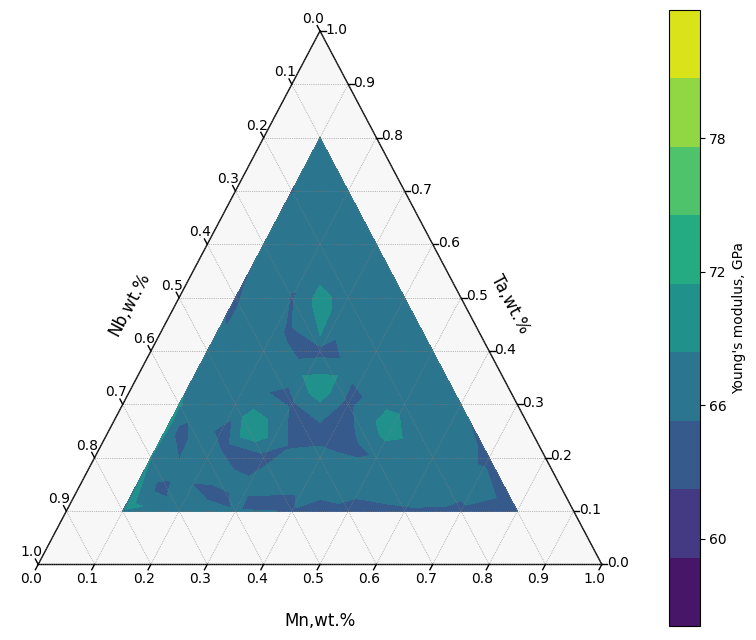

In [ ]:
alloy_combinations = combinations_4

# Specify the elements you want
elem1 = 'Nb,wt.%'
elem2 = 'Ta,wt.%'
elem3 = 'Mn,wt.%'

plot_ternary_contour(design, elem1, elem2, elem3, 'Predicted Modul elast, exp, GPa')

In [ ]:
#All combinatinos

alloy_combinations = combinations_4

for elem1, elem2, elem3 in alloy_combinations:
    plot_ternary_contour(design, elem1, elem2, elem3, 'Predicted Modul elast, exp, GPa')

###Calculate features (df) function

In [ ]:
#Define Function: calculate_features

def calculate_features(df):
    weight_percent_columns = [col for col in df.columns if "wt.%" in col]
    at_percent_columns = [col.replace("wt.%", "at.%") for col in weight_percent_columns]

    # Compute atomic percentages
    for weight_col, at_col in zip(weight_percent_columns, at_percent_columns):
        element = weight_col.split(",")[0]
        df[at_col] = (df[weight_col] / molar_mass[element]) / (df[weight_percent_columns].div(list(molar_mass.values())).sum(axis=1))

    # Calculate 'Density, g/cm^3'
    df['Density, g/cm^3'] = (df[weight_percent_columns].mul(list(element_densities.values())).sum(axis=1) / 100).values

    # Calculate 'e/a ratio'
    df['e/a ratio'] = (df[at_percent_columns].mul(list(element_valence_electrons.values())).sum(axis=1) ).values

    # Calculate '[Mo]eq_B'
    df['[Mo]eq_B'] = mo_eq_b = (df['Mo,wt.%'] + 0.28 * df['Nb,wt.%'] + 0.22 * df['Ta,wt.%'] + 2.90 * df['Fe,wt.%'] + 1.54 * df['Mn,wt.%'])

    # Calculate '[Mo]eq_W1'
    df['[Mo]eq_W1'] = mo_eq_w1 = (df['Mo,wt.%'] + 0.28 * df['Nb,wt.%'] + 0.22 * df['Ta,wt.%'] + 1.93 * df['Fe,wt.%'] + 2.26 * df['Mn,wt.%'] + 0.30 * df['Sn,wt.%'] + 0.47 * df['Zr,wt.%'] + 3.01 * df['Si,wt.%'])

    # Calculate 'Bo-bond order'
    df['Bo-bond order'] = (df[at_percent_columns].mul(list(element_bond_orders.values())).sum(axis=1)).values

    # Calculate 'd-orbital energy level (Md)'
    df['d-orbital energy level (Md)'] = (df[at_percent_columns].mul(list(d_orbital_energy.values())).sum(axis=1)).values

    # Calculate 'Specific heat, J/(kgK)'
    df['Specific heat, J/(kgK)'] = (df[at_percent_columns].mul(list(specific_heat.values())).sum(axis=1)).values

    # Calculate 'Delta r'
    df['Delta r'] = (df[at_percent_columns].mul(list(delta_r.values())).sum(axis=1) ).values

    #Assign Group
    df['group'] = df.apply(assign_group, axis=1)

    #Assign ±d(GPa)
    df['±d(GPa)'] = 0 #assumption that there is no deviations

    # Add 'slip_tw_group' column to DataFrame
    df['slip_tw_group'] = 2

    # Update 'slip_tw_group' based on the position relative to the line
    for i, point in enumerate(df[['Delta r', 'e/a ratio']].values):
        if point[1] > np.interp(point[0], e_a_arr2[:, 0], e_a_arr2[:, 1]):
            df.loc[i, 'slip_tw_group'] = 1

    #Drop all columns with at.%
    df = df.drop(columns=[col for col in df.columns if "at.%" in col])

    return df


In [ ]:
print(data.iloc[122,:])

Material                       Ti-24Nb-4Zr-7.9Sn
Ti,wt.%                                    64.10
Ti,at.%                                    78.41
Nb,wt.%                                    24.00
Nb,at.%                                    15.13
Zr,wt.%                                     4.00
Zr,at.%                                     2.57
Ta,wt.%                                     0.00
Ta,at.%                                     0.00
Sn,wt.%                                     7.90
Sn,at.%                                     3.90
Fe,wt.%                                     0.00
Fe,at.%                                     0.00
Mn,wt.%                                     0.00
Mn,at.%                                     0.00
Si,wt.%                                     0.00
Si,at.%                                     0.00
Mo,wt.%                                     0.00
Mo,at.%                                     0.00
O,wt.%                                      0.00
O,at.%              

In [ ]:
Check = pd.DataFrame({
    'Ti,wt.%': [74],
    'Nb,wt.%': [13],
    'Zr,wt.%': [13],
    'Ta,wt.%': [0],
    'Sn,wt.%': [0],
    'Fe,wt.%': [0],
    'Mn,wt.%': [0],
    'Si,wt.%': [0],
    'Mo,wt.%': [0],
    'O,wt.%': [0],
})
Check = calculate_features(Check)

print(Check)

   Ti,wt.%  Nb,wt.%  Zr,wt.%  Ta,wt.%  Sn,wt.%  Fe,wt.%  Mn,wt.%  Si,wt.%  \
0       74       13       13        0        0        0        0        0   

   Mo,wt.%  O,wt.%  Density, g/cm^3  e/a ratio  [Mo]eq_B  [Mo]eq_W1  \
0        0       0             5.29       4.08      3.64       9.75   

   Bo-bond order  d-orbital energy level (Md)  Specific heat, J/(kgK)  \
0           2.84                         2.48                  481.62   

   Delta r  group  ±d(GPa)  slip_tw_group  
0     0.94      4        0              2  


##Monte Carlo Simulations

In [ ]:
n_simulations = 10000000

# Generate random alloy compositions (in wt.%)
random_compositions = np.random.dirichlet(np.ones(len(weight_percent_columns)), size=n_simulations) * 100

# Convert the random compositions to a DataFrame with the appropriate column names
mc_df = pd.DataFrame(random_compositions, columns=weight_percent_columns)

# Calculate the missing features for the Monte Carlo samples
mc_df = calculate_features(mc_df)

# Make predictions using your trained model
X_mc = mc_df[features].values

# Scale the data
X_mc = min_max_scaler.transform(X_mc)

# Make predictions using the trained ExtraTreesRegressor model
y_mc_pred = best_etr.predict(X_mc)

# Add the predicted target values to the Monte Carlo DataFrame
mc_df['Predicted Modul elast, exp, GPa'] = y_mc_pred


In [ ]:
# Filter the DataFrame based on the desired target value range
filtered_mc_df = mc_df[(mc_df['Predicted Modul elast, exp, GPa'] <= 68)
                       & (mc_df['Ti,wt.%'].between(15, 25))
                       & (mc_df['O,wt.%'] < 0.78)


                       ]

print(filtered_mc_df)

         Ti,wt.%  O,wt.%  Nb,wt.%  Zr,wt.%  Ta,wt.%  Sn,wt.%  Fe,wt.%  \
1683406    20.02    0.54    16.27    12.75    18.37    13.60     1.10   
2165217    17.90    0.56    18.27    12.03    19.27    18.37     1.65   
2741453    22.16    0.27    12.38    18.03    16.60    15.85     4.41   
3764108    23.89    0.52    17.50    19.49    19.64     8.36     3.52   
7262388    20.91    0.36    19.56     7.67    17.82    19.13     2.45   
9342455    23.68    0.56    18.43     2.27    19.84    10.94     0.63   
9348543    23.33    0.57    18.99     8.06    19.99    17.72     2.17   
9757298    20.21    0.29    16.44    19.27    13.60    17.40     2.11   
9903007    18.36    0.00    15.25    13.82    18.47    19.43     4.45   

         Mn,wt.%  Si,wt.%  Mo,wt.%  Density, g/cm^3  e/a ratio  [Mo]eq_B  \
1683406     1.32     0.11    15.93             6.89       2.72     29.73   
2165217     8.74     0.53     2.68             7.31       3.57     30.29   
2741453     0.98     1.01     8.33       

In [ ]:
from itertools import combinations

elements = ['Nb,wt.%', 'Zr,wt.%', 'Ta,wt.%', 'Sn,wt.%', 'Fe,wt.%', 'Mn,wt.%', 'Si,wt.%', 'Mo,wt.%']

filtered_data = []
for combo in combinations(elements, 4):
    filtered_df = mc_df[(mc_df['Predicted Modul elast, exp, GPa'] <= 68)
                        & (mc_df['Ti,wt.%'].between(15, 25))
                        & (mc_df['O,wt.%'] < 0.78)
                        & ((mc_df[list(combo[:4])] >= 10) & (mc_df[list(combo[:4])] <= 20)).all(axis=1)
                        #& (mc_df[list(combo[3:])] < 1.0).all(axis=1)
                      ]
    filtered_data.append(filtered_df)

combined_df = pd.concat(filtered_data)
print(combined_df)


         Ti,wt.%  O,wt.%  Nb,wt.%  Zr,wt.%  Ta,wt.%  Sn,wt.%  Fe,wt.%  \
1683406    20.02    0.54    16.27    12.75    18.37    13.60     1.10   
2165217    17.90    0.56    18.27    12.03    19.27    18.37     1.65   
2741453    22.16    0.27    12.38    18.03    16.60    15.85     4.41   
9757298    20.21    0.29    16.44    19.27    13.60    17.40     2.11   
9903007    18.36    0.00    15.25    13.82    18.47    19.43     4.45   
1683406    20.02    0.54    16.27    12.75    18.37    13.60     1.10   
8052621    18.89    0.50    16.24    10.36    10.63     3.13     0.26   
2093590    15.32    0.26    16.02    11.72     0.17    11.72     0.30   
3687952    17.31    0.28    12.60    12.78    21.90    18.76     0.32   
1683406    20.02    0.54    16.27    12.75    18.37    13.60     1.10   
849595     15.61    0.35    10.25     3.12    10.94    16.15     0.61   
6719870    16.12    0.31    11.50     6.73    12.75    11.11     0.14   
9342455    23.68    0.56    18.43     2.27    19.84

In [ ]:
# Save DataFrame to a CSV file
filtered_mc_df.to_csv('MC_simulation.csv', index=False)